**YouTube Video ML Models: Language, Category & Duration Classification**

Description:

Language Classification Model – predicts the language of a video based on its title and description.

Category Classification Model – predicts video categories such as Education, Sports, Entertainment, and News.

Duration Classification Model – labels videos as Short, Medium, or Large based on their duration.

Features included:


Text preprocessing with TF-IDF.


Naive Bayes classification for all three models.


Accuracy evaluation and confusion matrix visualizations for detailed insights.


Visual comparison of model performances using bar charts and heatmaps.


Robust handling of missing labels and duplicates in merged datasets.

**Importing Files and Load Data**

In [1]:
import pandas as pd
import numpy as np
df1=pd.read_csv("channel_master_cleaned_UAT.csv",encoding='latin1')
df2=pd.read_csv("video_summary_cleaned_UAT.csv",encoding='latin1')

/tmp/ipython-input-2246472831.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("channel_master_cleaned_UAT.csv",encoding='latin1')


In [2]:
df1.head()

,Source.Name,video_id,title,uploader,channel_id,video_url,duration_sec,view_count,language
0,mst_all_languages_videos.csv,YbCF6OqTWug,Muththa Mazhai - Chinmayi Performance | Thug L...,Saregama Tamil,UCzee67JnEcuvjErRyWP3GpQ,https://www.youtube.com/watch?v=YbCF6OqTWug,240,95563292,tamil
1,mst_all_languages_videos.csv,4OL1QNYFZ1A,??LIVE : TVK Maanadu Madurai 2025 | Seeman Lat...,Thanthi TV,UC-JFyL0zDFOsPMpuWu39rPA,https://www.youtube.com/watch?v=4OL1QNYFZ1A,15691,383054,tamil
2,mst_all_languages_videos.csv,Xoadqhotor8,Vijay's Political Gambit: A New Force In Tamil...,India Today,UCYPvAwZP8pZhSMW8qs7cVCw,https://www.youtube.com/watch?v=Xoadqhotor8,528,2460,tamil
3,mst_all_languages_videos.csv,5RcJKmrdDZg,Mega Blast Glimpse (Tamil) | Vishwambhara | Me...,UV Creations,UCmse5JbKneJqVyerfhDVYvQ,https://www.youtube.com/watch?v=5RcJKmrdDZg,75,1909678,tamil
4,mst_all_languages_videos.csv,i2oBI89uhO8,Today Bible Verse in Tamil I Today Bible Verse...,Today Bible Verse in Tamil,UCByt9_sOmU0ysxO_8ndetaQ,https://www.youtube.com/watch?v=i2oBI89uhO8,616,3273,tamil


In [3]:
df2.head()

,Channelid,subscribercount,channelname,title,uploader,channelurl,shortdescription,last_upload_date
0,UCmse5JbKneJqVyerfhDVYvQ,1610000,UV Creations,UV Creations,UV Creations,https://www.youtube.com/channel/UCmse5JbKneJqV...,UV Creations; founded in 2012 by V Vamsikrishn...,NaN
1,UCtOtzF5LuR0UIcKsKSG9_aw,1490000,IDHAYAM TV,IDHAYAM TV,IDHAYAM TV,https://www.youtube.com/channel/UCtOtzF5LuR0UI...,OFFICIAL Youtube Channel of IDHAYAM TV; Based ...,NaN
2,UCzee67JnEcuvjErRyWP3GpQ,10000000,Saregama Tamil,Saregama Tamil,Saregama Tamil,https://www.youtube.com/channel/UCzee67JnEcuvj...,Saregama India Limited - the one-stop destinat...,NaN
3,UC-JFyL0zDFOsPMpuWu39rPA,12100000,Thanthi TV,Thanthi TV,Thanthi TV,https://www.youtube.com/channel/UC-JFyL0zDFOsP...,Thanthi TV is a News and Infotainment Channel ...,NaN
4,UCYPvAwZP8pZhSMW8qs7cVCw,10700000,India Today,India Today,India Today,https://www.youtube.com/channel/UCYPvAwZP8pZhS...,India Today TV is India's leading English News...,NaN


Check empty rows Columns in df1 and df2

In [4]:
df1.isna().sum()

,0
Source.Name,0
video_id,842
title,0
uploader,0
channel_id,0
video_url,2670
duration_sec,0
view_count,0
language,0


In [5]:
df1=df1.drop(columns=['video_id','video_url'])


In [6]:
df1.isna().sum()

,0
Source.Name,0
title,0
uploader,0
channel_id,0
duration_sec,0
view_count,0
language,0


In [7]:
df2.isna().sum()

,0
Channelid,0
subscribercount,0
channelname,30
title,30
uploader,30
channelurl,0
shortdescription,39
last_upload_date,17917


In [8]:
df2=df2.drop(columns=['last_upload_date'])


In [9]:
# Replace NaN with "Unknown"
df2["channelname"] = df2["channelname"].fillna("Unknown")
df2["title"] = df2["title"].fillna("Unknown")
df2["uploader"] = df2["uploader"].fillna("Unknown")
df2["shortdescription"] = df2["shortdescription"].fillna("Unknown")

In [10]:
df2.isna().sum()

,0
Channelid,0
subscribercount,0
channelname,0
title,0
uploader,0
channelurl,0
shortdescription,0


Check duplicate values in dataframes

In [11]:
df1.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
67912,False
67913,False
67914,False
67915,False


In [12]:
df2.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
18250,False
18251,False
18252,False
18253,False


check Shape of dataset

In [13]:
print(df1.shape)
print(df2.shape)

(67917, 7)
(18255, 7)


Check columns names in Dataframes

In [14]:
print(df1.columns.tolist())

['Source.Name', 'title', 'uploader', 'channel_id', 'duration_sec', 'view_count', 'language']


In [15]:
print(df2.columns.tolist())

['Channelid', 'subscribercount', 'channelname', 'title', 'uploader', 'channelurl', 'shortdescription']


In [21]:
df2 = df2.rename(columns={"Channelid": "channel_id"})


In [22]:
df2.columns = df2.columns.str.strip().str.lower().str.replace(" ", "_")


In [25]:
df2 = df2.rename(columns={'Channelid':'channel_id'})  # rename the correct column
merged_df = pd.merge(df1, df2, on='channel_id', how='left')


In [27]:
merged_df.head()

,Source.Name,title_x,uploader_x,channel_id,duration_sec,view_count,language,subscribercount,channelname,title_y,uploader_y,channelurl,shortdescription
0,mst_all_languages_videos.csv,Muththa Mazhai - Chinmayi Performance | Thug L...,Saregama Tamil,UCzee67JnEcuvjErRyWP3GpQ,240,95563292,tamil,10000000.0,Saregama Tamil,Saregama Tamil,Saregama Tamil,https://www.youtube.com/channel/UCzee67JnEcuvj...,Saregama India Limited - the one-stop destinat...
1,mst_all_languages_videos.csv,??LIVE : TVK Maanadu Madurai 2025 | Seeman Lat...,Thanthi TV,UC-JFyL0zDFOsPMpuWu39rPA,15691,383054,tamil,12100000.0,Thanthi TV,Thanthi TV,Thanthi TV,https://www.youtube.com/channel/UC-JFyL0zDFOsP...,Thanthi TV is a News and Infotainment Channel ...
2,mst_all_languages_videos.csv,Vijay's Political Gambit: A New Force In Tamil...,India Today,UCYPvAwZP8pZhSMW8qs7cVCw,528,2460,tamil,10700000.0,India Today,India Today,India Today,https://www.youtube.com/channel/UCYPvAwZP8pZhS...,India Today TV is India's leading English News...
3,mst_all_languages_videos.csv,Mega Blast Glimpse (Tamil) | Vishwambhara | Me...,UV Creations,UCmse5JbKneJqVyerfhDVYvQ,75,1909678,tamil,1610000.0,UV Creations,UV Creations,UV Creations,https://www.youtube.com/channel/UCmse5JbKneJqV...,UV Creations; founded in 2012 by V Vamsikrishn...
4,mst_all_languages_videos.csv,Today Bible Verse in Tamil I Today Bible Verse...,Today Bible Verse in Tamil,UCByt9_sOmU0ysxO_8ndetaQ,616,3273,tamil,74300.0,Today Bible Verse in Tamil,Today Bible Verse in Tamil,Today Bible Verse in Tamil,https://www.youtube.com/channel/UCByt9_sOmU0ys...,Start your day with God ! We will be sharing ...


In [28]:

#  Decide which title/uploader to keep
# Let's keep video-level info (title_x, uploader_x), drop the channel duplicates
merged_df = merged_df.drop(columns=["title_y", "uploader_y"])



In [29]:
 #Rename for clarity
merged_df = merged_df.rename(columns={
    "title_x": "title",
    "uploader_x": "uploader"
})


In [30]:
merged_df.head(3)

,Source.Name,title,uploader,channel_id,duration_sec,view_count,language,subscribercount,channelname,channelurl,shortdescription
0,mst_all_languages_videos.csv,Muththa Mazhai - Chinmayi Performance | Thug L...,Saregama Tamil,UCzee67JnEcuvjErRyWP3GpQ,240,95563292,tamil,10000000.0,Saregama Tamil,https://www.youtube.com/channel/UCzee67JnEcuvj...,Saregama India Limited - the one-stop destinat...
1,mst_all_languages_videos.csv,??LIVE : TVK Maanadu Madurai 2025 | Seeman Lat...,Thanthi TV,UC-JFyL0zDFOsPMpuWu39rPA,15691,383054,tamil,12100000.0,Thanthi TV,https://www.youtube.com/channel/UC-JFyL0zDFOsP...,Thanthi TV is a News and Infotainment Channel ...
2,mst_all_languages_videos.csv,Vijay's Political Gambit: A New Force In Tamil...,India Today,UCYPvAwZP8pZhSMW8qs7cVCw,528,2460,tamil,10700000.0,India Today,https://www.youtube.com/channel/UCYPvAwZP8pZhS...,India Today TV is India's leading English News...


In [31]:
# Drop duplicate channelid column
if "channelid" in merged_df.columns:
    merged_df = merged_df.drop(columns=["channelid"])


In [32]:
merged_df.columns

Index(['Source.Name', 'title', 'uploader', 'channel_id', 'duration_sec',
       'view_count', 'language', 'subscribercount', 'channelname',
       'channelurl', 'shortdescription'],
      dtype='object')

Prepare Text

combine title + shortdescription and cleaned it

In [33]:
merged_df['text']=merged_df['title']+merged_df['shortdescription']

In [34]:
#import regex(re) library
import re
merged_df['text_clean']=merged_df['text'].str.lower().fillna('')
merged_df['text_clean']=merged_df['text_clean'].apply(lambda x:re.sub(r'[^a-zA-Z\s]','',x))

**Model A**

Category Classification on the basis (description and title)

(tech,education,entertainment,sports,News,other)

In [35]:

def categorize(text):
  text=text.lower()
  if any(word in text for word in ['study','learn','tutorial','course']):
    return 'Education'
  elif any(word in text for word in ['Game','match','team','score','Goal']):
    return 'Sports'
  elif any(word in text for word in ['Movie','Song','Show','Fun','webseries','drame']):
    return 'Entertainment'
  elif any(word in text for word in ['News','Report','Update']):
    return 'News'
  elif any(word in text for word in ['tech','innovation','tehnology','future']):
    return 'Tech'
  else:
    return 'Other'
merged_df['category']=merged_df['text_clean'].apply(categorize)

In [36]:
merged_df.head(2)

,Source.Name,title,uploader,channel_id,duration_sec,view_count,language,subscribercount,channelname,channelurl,shortdescription,text,text_clean,category
0,mst_all_languages_videos.csv,Muththa Mazhai - Chinmayi Performance | Thug L...,Saregama Tamil,UCzee67JnEcuvjErRyWP3GpQ,240,95563292,tamil,10000000.0,Saregama Tamil,https://www.youtube.com/channel/UCzee67JnEcuvj...,Saregama India Limited - the one-stop destinat...,Muththa Mazhai - Chinmayi Performance | Thug L...,muththa mazhai chinmayi performance thug lif...,Other
1,mst_all_languages_videos.csv,??LIVE : TVK Maanadu Madurai 2025 | Seeman Lat...,Thanthi TV,UC-JFyL0zDFOsPMpuWu39rPA,15691,383054,tamil,12100000.0,Thanthi TV,https://www.youtube.com/channel/UC-JFyL0zDFOsP...,Thanthi TV is a News and Infotainment Channel ...,??LIVE : TVK Maanadu Madurai 2025 | Seeman Lat...,live tvk maanadu madurai seeman latest pres...,Other


Use TF-IDF to convert text into numeric features:

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
x_features=vectorizer.fit_transform(merged_df['text_clean'])

**Model B**

Content category classification on the basis of vid_duration

Creating Duration labels

short : <240 sec (<4 min)

medium : <240-1200 sec (4-20 min)

large : >1200 sec (>20 min)

In [38]:
def duration_label(seconds):
  if seconds < 240:
    return 'short video'
  elif seconds <=1200:
    return 'medium video'
  else:
    return 'Large'
merged_df['duration_label']=merged_df['duration_sec'].apply(duration_label)

Encode duration label

ML model can't used text directly for that we use label encoder

In [39]:

from sklearn .preprocessing import LabelEncoder
le_duration =LabelEncoder()
merged_df['duration_encoded']=le_duration.fit_transform(merged_df['duration_label'])
# Now duration encoded is numeric(0,1,2) for short,medium and large


In [40]:
merged_df.head(2)

,Source.Name,title,uploader,channel_id,duration_sec,view_count,language,subscribercount,channelname,channelurl,shortdescription,text,text_clean,category,duration_label,duration_encoded
0,mst_all_languages_videos.csv,Muththa Mazhai - Chinmayi Performance | Thug L...,Saregama Tamil,UCzee67JnEcuvjErRyWP3GpQ,240,95563292,tamil,10000000.0,Saregama Tamil,https://www.youtube.com/channel/UCzee67JnEcuvj...,Saregama India Limited - the one-stop destinat...,Muththa Mazhai - Chinmayi Performance | Thug L...,muththa mazhai chinmayi performance thug lif...,Other,medium video,1
1,mst_all_languages_videos.csv,??LIVE : TVK Maanadu Madurai 2025 | Seeman Lat...,Thanthi TV,UC-JFyL0zDFOsPMpuWu39rPA,15691,383054,tamil,12100000.0,Thanthi TV,https://www.youtube.com/channel/UC-JFyL0zDFOsP...,Thanthi TV is a News and Infotainment Channel ...,??LIVE : TVK Maanadu Madurai 2025 | Seeman Lat...,live tvk maanadu madurai seeman latest pres...,Other,Large,0


In [41]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Convert to numpy and make 2D
X_numeric = np.array(merged_df['duration_encoded']).reshape(-1, 1)

X_text = TfidfVectorizer(max_features=5000).fit_transform(merged_df['text_clean'])


# Combine with TF-IDF features
X = hstack([X_text, X_numeric])
y= merged_df['language']

Split Data

Model A (category classification: News, Sports , education ,entertainment)

Model B (Language Classification: tamil,Hindi....)

In [42]:
from sklearn.model_selection import train_test_split

#Category Model
X_train_cat,X_test_cat,y_train_cat,y_test_cat=train_test_split( x_features,merged_df['category'],test_size=0.2,random_state=42)

# Video duration Model
X_train_dur,x_test_dur,y_train_dur,y_test_dur=train_test_split(X,y,test_size=0.2,random_state=42)

#Language Model
X_train_lang,X_test_lang,y_train_lang,y_test_lang=train_test_split( x_features,merged_df['language'],test_size=0.2,random_state=42)


Train Models

Used Multinomial Naive Bayes (Good for text)

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# Category
model_cat=MultinomialNB()
model_cat.fit(X_train_cat,y_train_cat)
y_pred_cat=model_cat.predict(X_test_cat)
acc_cat=accuracy_score(y_test_cat,y_pred_cat)
print('Content classifiaction  Model Accuracy Score :',acc_cat)

# Video duration
model_duration= MultinomialNB()
model_duration.fit(X_train_dur,y_train_dur)
y_pred_dur=model_duration.predict(x_test_dur)
acc_duration=accuracy_score(y_test_dur,y_pred_dur)
print('Video Duration Model Accuracy Score :',acc_duration)

# Language Model
model_lang=MultinomialNB()
model_lang.fit(X_train_lang,y_train_lang)
y_pred_lang=model_lang.predict(X_test_lang)
acc_language=accuracy_score(y_test_lang,y_pred_lang)
print('Language Model Accuracy Score :',acc_language)

Content classifiaction  Model Accuracy Score : 0.9126914016489989
Video Duration Model Accuracy Score : 0.4881478209658422
Language Model Accuracy Score : 0.4994110718492344


for Language Classification  model -  used LogisticRegression for
better performance

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
model_lang = LogisticRegression(max_iter=1000)
model_lang.fit(X_train_lang, y_train_lang)
y_pred_lang = model_lang.predict(X_test_lang)

acc_lang = accuracy_score(y_test_lang, y_pred_lang)
print(f"Language Classification Accuracy: {acc_lang:.4f}")

Language Classification Accuracy: 0.3705


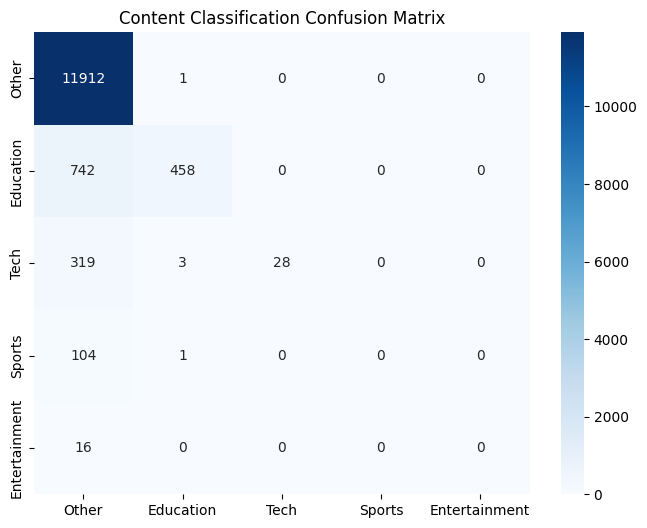

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test_cat, y_pred_cat, labels=y_train_cat.unique())
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_train_cat.unique(), yticklabels=y_train_cat.unique())
plt.title("Content Classification Confusion Matrix")
plt.show()


**Video Duration - Random Forest Model**

using for better performace


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_dur = RandomForestClassifier(n_estimators=50, max_depth=5, n_jobs=-1, random_state=42)
model_dur.fit(X_train_dur, y_train_dur)
y_pred_dur = model_dur.predict(x_test_dur)


acc_dur = accuracy_score(y_test_dur, y_pred_dur)
print(f"Video Duration Classification Accuracy: {acc_dur:.4f}")

Video Duration Classification Accuracy: 0.5010


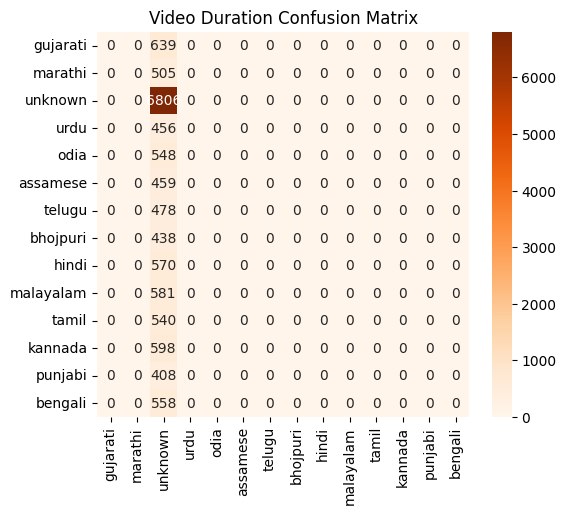

In [49]:
cm = confusion_matrix(y_test_dur, y_pred_dur, labels=y_train_dur.unique())
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=y_train_dur.unique(), yticklabels=y_train_dur.unique())
plt.title("Video Duration Confusion Matrix")
plt.show()

🔹 Accuracy Results


Content  Classification	Title 	Multinomial Naive Bayes	0.9127


Language Classification	Title 	Multinomial Naive Bayes	0.4994


Language Classification	Title LogisticRegression	0.3705


Video Duration Classification	Duration Encoded (numeric)	Multinomial Naive Bayes	0.4881


Video Duration Classification	Duration Encoded (numeric)	RandomForestClassifier	0.5010





/tmp/ipython-input-3195766010.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="Set3")


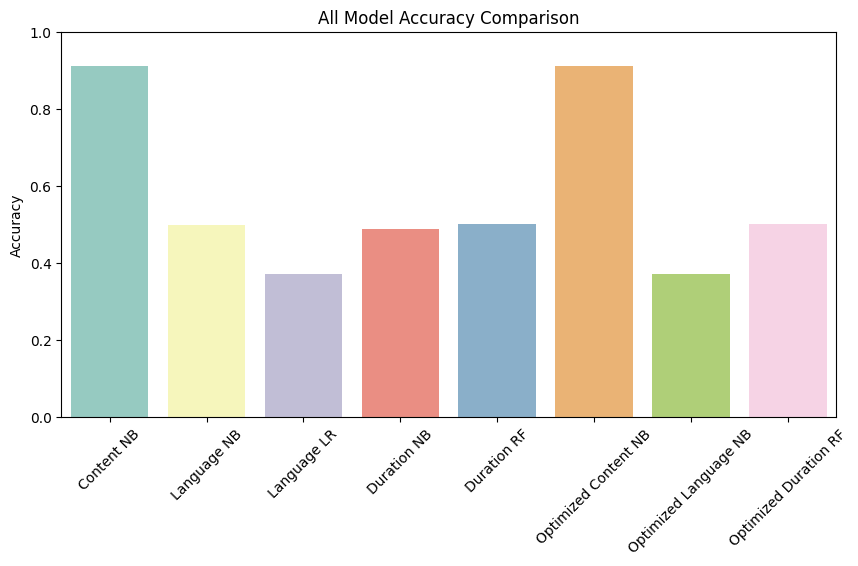

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Manually enter all your results
results = {
    "Content NB": 0.9127,
    "Language NB": 0.4994,
    "Language LR": 0.3705,
    "Duration NB": 0.4881,
    "Duration RF": 0.5010,
    "Optimized Content NB": acc_cat,  # from pipeline
    "Optimized Language NB": acc_lang,    # from pipeline
    "Optimized Duration RF": acc_dur      # from pipeline
}

plt.figure(figsize=(10,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="Set3")
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("All Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()
